In [5]:
import pandas as pd

# The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

In [6]:
google_play_df = pd.read_csv("data/google-play-store-apps/googleplaystore.csv")
display(google_play_df.head())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
google_play_reviews_df = pd.read_csv("data/google-play-store-apps/googleplaystore_user_reviews.csv")
google_play_reviews_df.head(100)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
...,...,...,...,...,...
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
96,10 Best Foods for You,Love app. It gives way good idea I buying stor...,Positive,0.400000,0.400000
97,10 Best Foods for You,Great Its really best unique provides detailed...,Positive,0.579167,0.683333
98,10 Best Foods for You,Nothing special! Could find anything useful!,Positive,0.410714,0.285714


# Question 1: 
Which category, in your opinion, has the best ratings? How are you measuring best ratings?


Use the `googleplaystore.csv`

In [8]:
### Checking for info on dataframe and missing data
google_play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
## Changing REviews to an Integer
google_play_df['ReviewsasInt'] = pd.to_numeric(google_play_df['Reviews'],errors='coerce')
google_play_df['ReviewsasInt']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: ReviewsasInt, Length: 10841, dtype: float64

In [10]:
## Checking for missing data

google_play_df.isna().sum()


## The Ratings Column has 1474 missing values. 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
ReviewsasInt         1
dtype: int64

In [11]:
## distribution check
google_play_df['Rating'].plot(kind = 'hist')

In [12]:
display(google_play_df.groupby(['Category'])['Rating'].agg(['mean', 'median','max','min']).head())

## Getting a mean and median of the values
## However here I can see a clear error - Category 1.9 with a rating of 19  - but the max is 5 - This must be deleted

,mean,median,max,min
Category,,,,
1.9,19.000000,19.0,19.0,19.0
ART_AND_DESIGN,4.358065,4.4,5.0,3.2
AUTO_AND_VEHICLES,4.190411,4.3,4.9,2.1
BEAUTY,4.278571,4.3,4.9,3.1
BOOKS_AND_REFERENCE,4.346067,4.5,5.0,2.7


In [13]:
display(google_play_df.loc[(google_play_df['Category'] == '1.9')])
### Investigating this cell further ###

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ReviewsasInt
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN


In [14]:
### Deleting this Row ###
google_play_df.drop(10472, axis = 0, inplace=True)


In [15]:
#### Checking it was deleted
(google_play_df.loc[(google_play_df['Category'] == '1.9')])


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ReviewsasInt


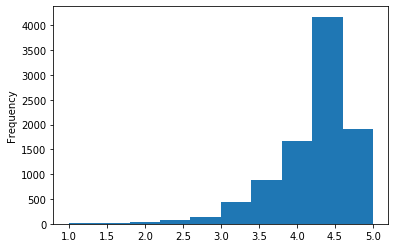

In [16]:
#### Now I will check again what my distrbutions and stats look like

google_play_df['Rating'].plot(kind = 'hist')

## Can see my data is skewed to right.


In [17]:
google_play_df.groupby(['Category'])['Rating'].median().sort_values(ascending = False);
### Says Health_and_fitness, books and reference and events are highest rated

In [18]:
google_play_df.loc[(google_play_df['Category'] == "HEALTH_AND_FITNESS")].isna().sum();
google_play_df.loc[(google_play_df['Category'] == "HEALTH_AND_FITNESS")];
## Health And Fitness Category has 44 missing reviews

In [19]:
display(google_play_df.loc[(google_play_df['Category'] == "BOOKS_AND_REFERENCE")].isna().sum())
google_play_df.loc[(google_play_df['Category'] == "BOOKS_AND_REFERENCE")]
### Books and Reference has 53 missing values
### Books and Reference has 53 missing values

App                0
Category           0
Rating            53
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        1
Android Ver        0
ReviewsasInt       0
dtype: int64

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ReviewsasInt
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device,2914724.0
140,E-Book Read - Read Book for free,BOOKS_AND_REFERENCE,4.5,1857,4.9M,"50,000+",Free,0,Everyone,Books & Reference,"August 3, 2018",1.3.2,4.4 and up,1857.0
141,Download free book with green book,BOOKS_AND_REFERENCE,4.6,4478,9.5M,"100,000+",Free,0,Everyone 10+,Books & Reference,"July 31, 2017",1.1,4.0 and up,4478.0
142,Wikipedia,BOOKS_AND_REFERENCE,4.4,577550,Varies with device,"10,000,000+",Free,0,Everyone,Books & Reference,"August 2, 2018",Varies with device,Varies with device,577550.0
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device,814080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10815,Golden Dictionary (FR-AR),BOOKS_AND_REFERENCE,4.2,5775,4.9M,"500,000+",Free,0,Everyone,Books & Reference,"July 19, 2018",7.0.4.6,4.2 and up,5775.0
10819,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52,3.6M,"5,000+",Free,0,Teen,Books & Reference,"August 5, 2017",0.3.4,4.1 and up,52.0
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4M,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up,603.0
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,44.0


In [20]:
display(google_play_df.loc[(google_play_df['Category'] == "EVENTS")].isna().sum())


App                0
Category           0
Rating            19
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
ReviewsasInt       0
dtype: int64

In [21]:
#### Given that data is not normally distributed - will replace the missing values with the median

In [22]:
google_play_df['Rating'].median()

4.3

In [23]:
### Replacing missing data in rating column with the median because it is not normally distributed

google_play_df['Rating'].fillna(google_play_df['Rating'].median(), inplace = True)

NameError: name 'plt' is not defined

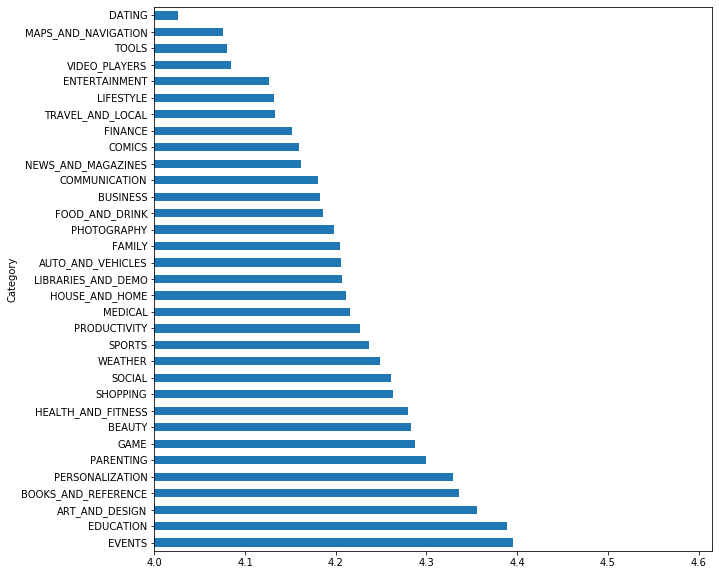

In [24]:

## Normal Averages

google_play_df.groupby(['Category'])['Rating'].mean().sort_values(ascending = False).plot(kind = 'barh',figsize = (10,10), xlim = (4))
plt.xlabel("Rating from 4 to 5")

In [ ]:
def wavg(group, avg_name, weight_name):
    """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    In rare instance, we may not have weights, so just return the mean. Customize this if your business case
    should return otherwise.
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [ ]:
wavg(google_play_df, 'Rating', 'ReviewsasInt')

In [ ]:
weighted_averages = google_play_df.groupby("Category").apply(wavg, 'Rating', 'ReviewsasInt').sort_values(ascending = False)
weighted_averages.plot(kind= 'barh', figsize = (20,20), xlim = 4)

plt.xlabel('Rating from 4 to 5')
plt.ylabel('Category Name')
plt.title('Weighted Average Rating by Category');


Education is the best rated category !!! 
I replaced the missing values with the median of the column, given that the overall data was not normally distributed.

Then found a weight average of ratings using number of reviews

# Answer
We started by cleaning our data. We checked the distribution and found that it was skewed to the left. This was due to a rogue entry with an extremely high number
This was then deleted and we rechecked the skew to find it was no skewed to the right. Because of this, we replaced missing values in the column with the median

We then used a weighted average function to find the weighted average of the ratings per category. We did this to take into account the large number of reviews some apps have

We concluded that Education was the highest rated app, on the weighted average basis.

# Recommendation

To consumers with children, or looking into further education, we would recommend they explore using an app rather than traditional book learning as our data indicates uses who download this apps, give them a high rating, implying they are useful in the education process

# Question 2:
Is there a relationship between ratings and size? How did you measure the relationship? Why did you choose this measurement? 

Please create a scatterplot of size vs ratings to demonstrate the relationship or lack thereof. 

# Answer
No there is no relationship between ratings and size. This is clear from our scatterplot, and can also be confirmed from the correlation coefficient between ratings and size being 0.06

we started by changing the size column to an integer so it was easily comparable to ratings

In [25]:
## Sorting values by count
google_play_df['Size'].value_counts().sort_values(ascending = False)

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
551k                     1
636k                     1
613k                     1
600k                     1
458k                     1
Name: Size, Length: 461, dtype: int64

In [26]:
### We are going to drop rows with varies by devices ###
google_play_df.drop(google_play_df.loc[google_play_df['Size']== 'Varies with device'].index, inplace = True)

In [27]:
# Now look at column
google_play_df['Size'].value_counts().sort_values(ascending = False)

11M     198
12M     196
14M     194
13M     191
15M     184
       ... 
526k      1
34k       1
421k      1
280k      1
41k       1
Name: Size, Length: 460, dtype: int64

In [28]:
### To compare with our Ratings cell we need to make size an integer cel
## WE then divide by 1000 to get our number in M
google_play_df['SizeasNum'] = google_play_df['Size'].str.replace("M",'000').str.replace("k","").str.replace(",","").str.replace("+","")
google_play_df['SizeasNum'] = google_play_df['SizeasNum'].astype(float)
google_play_df['SizeasNum'] = google_play_df['SizeasNum'].apply(lambda x: x/1000)

In [29]:
google_play_df['SizeasNum'].value_counts().sort_values(ascending = False)
google_play_df['SizeasNum'].mean()

19.579419912520503

Text(0.5, 0, 'Size')

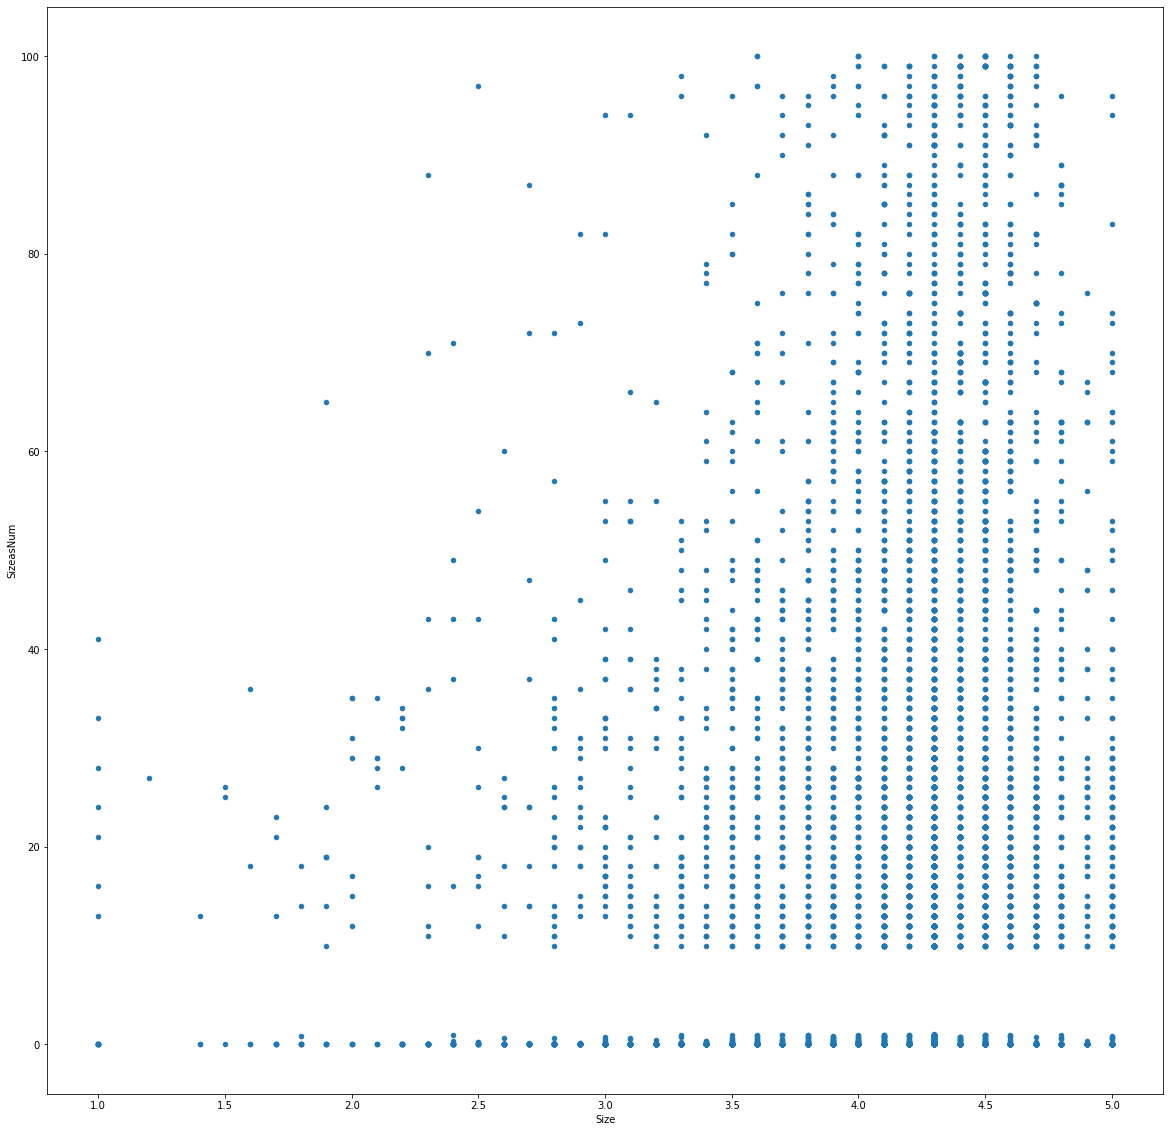

In [30]:
import matplotlib.pyplot as plt
google_play_df.plot.scatter(x='Rating', y='SizeasNum', figsize = (20,20))
plt.xlabel("Size")

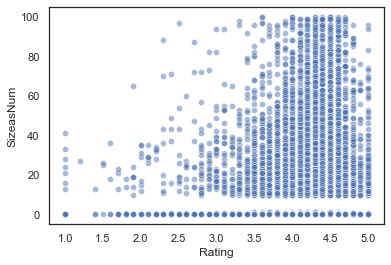

In [31]:
import seaborn as sns
sns.set(style="white")
sns.scatterplot(x= google_play_df['Rating'], y=google_play_df['SizeasNum'], alpha=.5, palette="muted", sizes = (50,50))


In [32]:
print(f"( The Correlation coefficient of is: {google_play_df.corr()['Rating']['SizeasNum']}") 

( The Correlation coefficient of is: 0.06456535373553786


# For this next section, choose a Category of playstore apps

## Category Chosen: GAME



# Question 3:
For your category, how many genres are represented? What are their counts? Please show this with a bar chart. 

# Answer
There are 23 Genres. Their counts are displayed in the bar chart below

# Recommendation


To app developers developing games, Action appears to be the most saturated genre in he game category. We would recommend looking at other less saturated categories, such as simulation or Role Playing. Moreover, we would recommend ensuring that you choose the name of the genre you wish to be in to avoid being lost in app searches by genre. We found that genres such as Casual;Creativity were not coming up in searches for Casual.

In [33]:
### Games DataFrame
game_df = google_play_df.loc[(google_play_df['Category'] == "GAME")]
game_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ReviewsasInt,SizeasNum
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,4447388.0,67.0
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,27722264.0,76.0
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,22426677.0,74.0
1656,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up,254258.0,23.0
1657,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up,148897.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,GAME,4.0,1287,38M,"50,000+",Free,0,Everyone,Word,"December 18, 2013",1.0,2.2 and up,1287.0,38.0
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661,16M,"1,000,000+",Free,0,Everyone,Trivia,"May 24, 2018",1.3.81,4.0 and up,21661.0,16.0
10793,Sid Story,GAME,4.4,28510,78M,"500,000+",Free,0,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up,28510.0,78.0
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,"1,000,000+",Free,0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up,56496.0,81.0


In [34]:
genres = game_df['Genres'].value_counts().sort_values(ascending = True)
genres

Simulation;Action & Adventure      1
Casual;Creativity                  1
Casual;Pretend Play                1
Simulation;Education               1
Casual;Brain Games                 1
Action;Action & Adventure          2
Adventure;Action & Adventure       5
Simulation                         9
Sports                            14
Role Playing                      15
Music                             16
Strategy                          22
Word                              25
Puzzle                            33
Casino                            34
Casual                            35
Trivia                            37
Board                             41
Card                              42
Adventure                         69
Racing                            88
Arcade                           196
Action                           327
Name: Genres, dtype: int64

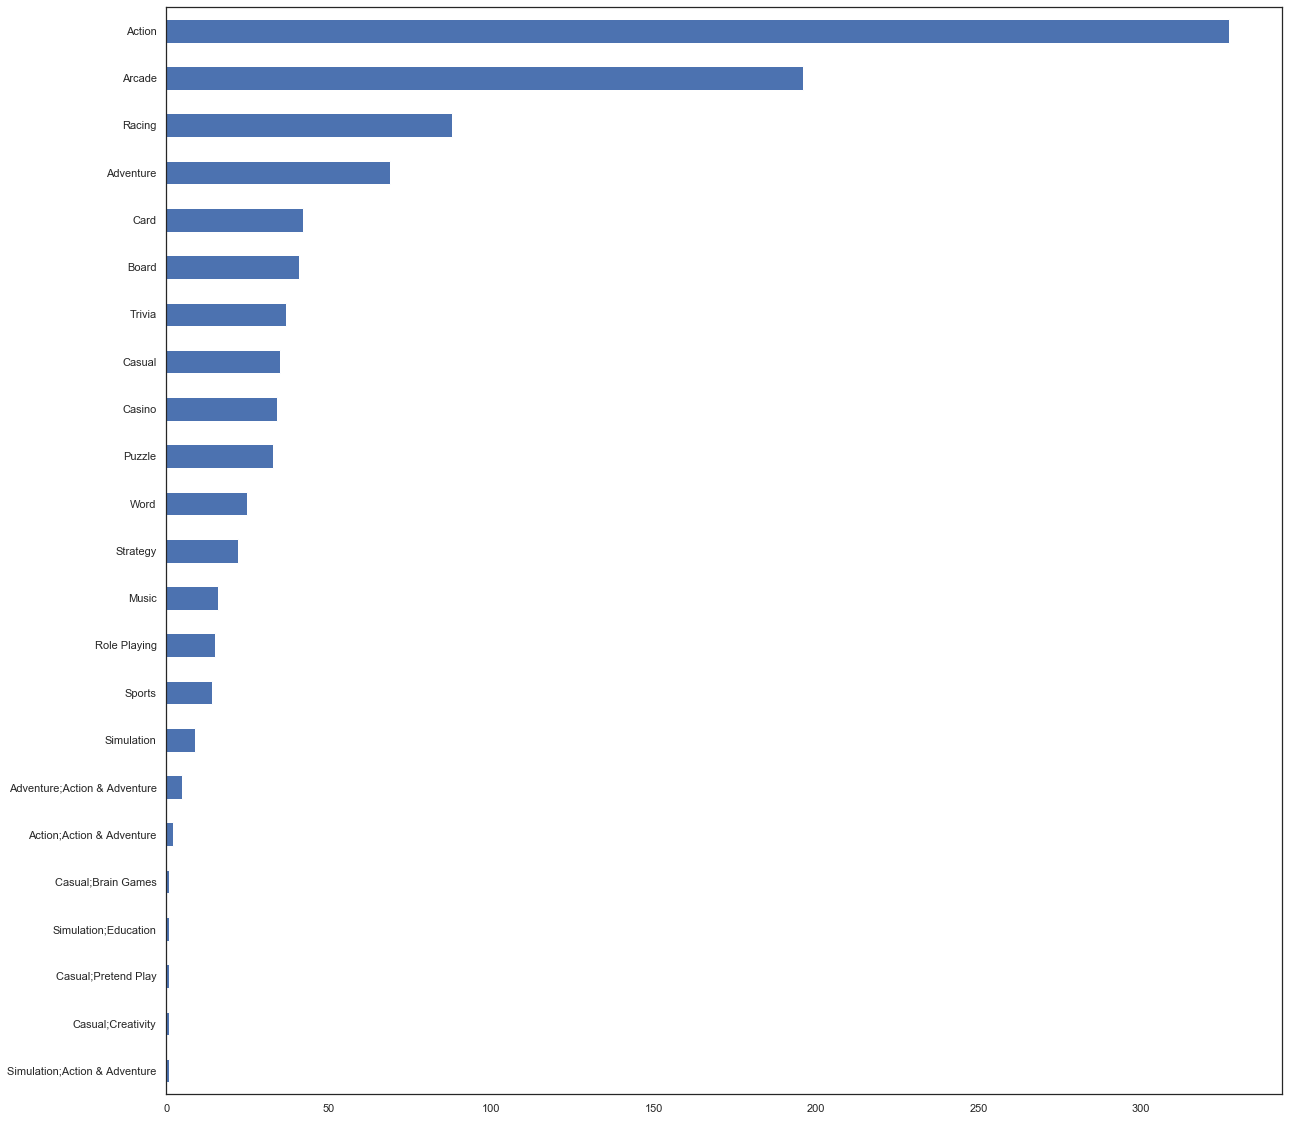

In [35]:
genres.plot(kind='barh', figsize=(20,20))

# Question 4:
What is something interesting you found about your category? 

# Answer

The number of reviews and the rating are positively correlated with a correlation coefficient of 0.72. We also found the most number of apps were ones made for everyone. This was obviously to be expected, however we found it interesting that the second largest number of apps were aimed at Teenagers

For app developers, we would reccomend looking into the mature 17+ , or the everyone 10+ categories, as these are least made.

In [36]:
game_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 1653 to 10804
Data columns (total 15 columns):
App               1015 non-null object
Category          1015 non-null object
Rating            1015 non-null float64
Reviews           1015 non-null object
Size              1015 non-null object
Installs          1015 non-null object
Type              1015 non-null object
Price             1015 non-null object
Content Rating    1015 non-null object
Genres            1015 non-null object
Last Updated      1015 non-null object
Current Ver       1015 non-null object
Android Ver       1015 non-null object
ReviewsasInt      1015 non-null float64
SizeasNum         1015 non-null float64
dtypes: float64(3), object(12)
memory usage: 126.9+ KB


Content Rating
Everyone        537
Everyone 10+    114
Mature 17+       63
Teen            301
Name: App, dtype: int64

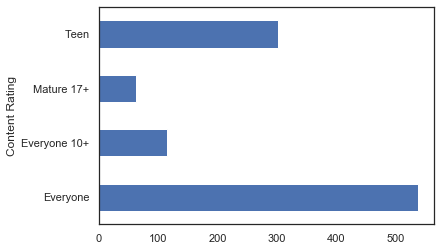

In [37]:
display(game_df.groupby(['Content Rating'])['App'].count())
game_df.groupby('Content Rating')['App'].count().plot(kind = 'barh')

Best Selling apps are targetted at everyone. If you were to target at a specific age demopgraphic, do it towards teens

In [38]:
game_df['PriceinDollar'] = game_df['Price'].str.replace('$',"").astype(float)


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
game_df['PriceinDollar'] = game_df['PriceinDollar'].sort_values(ascending = True)


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
game_df['changedinstalls'] = game_df['Installs'].str.replace("+","").str.replace(",","")


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
game_df['changedinstalls'] = game_df['changedinstalls'].astype(int)/1000

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
display(game_df.corr())

game_df.corr()['changedinstalls']['ReviewsasInt']

,Rating,ReviewsasInt,SizeasNum,PriceinDollar,changedinstalls
Rating,1.000000,0.158794,0.183890,0.059768,0.109529
ReviewsasInt,0.158794,1.000000,0.292106,-0.063852,0.723601
SizeasNum,0.183890,0.292106,1.000000,-0.123277,0.195991
PriceinDollar,0.059768,-0.063852,-0.123277,1.000000,-0.061431
changedinstalls,0.109529,0.723601,0.195991,-0.061431,1.000000


0.723601258446852

0.723601258446852

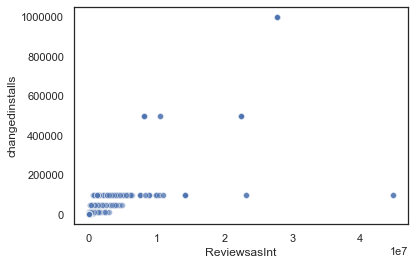

In [43]:
import seaborn as sns
sns.set(style="white")
sns.scatterplot(x= 'ReviewsasInt', y ='changedinstalls', data= game_df, alpha=.5, palette="muted", sizes = (100,100))

game_df.corr()['ReviewsasInt']['changedinstalls']

# Question 5:
What is something interesting you found about your category in relationship to the rest of the data? 

# Answer
The Game category was ranked 3rd highest in the free section, and 2nd highest in the paid section for number of apps. As a percentage within the Game Category, 92% of apps were free. Given that only 8% of Game apps were paid for , it is interesting that it is the 2nd highest category for paid apps. This could be down to the fact that the Game Category is the second largest in terms of app counts, or could imply that most categories do not offer paid apps.

# Recommendation

Our Recommendation for app developers, we would recommmend making apps for this genre free, and making money from ingame purchases or advetisements, rather than a fee for the app itself.

In [44]:
bars1 = game_df[game_df['Type'] == "Free"].count()
bars2 = game_df[game_df['Type'] == "Paid"].count()
bars1

## number of free/paid apps in game df

App                936
Category           936
Rating             936
Reviews            936
Size               936
Installs           936
Type               936
Price              936
Content Rating     936
Genres             936
Last Updated       936
Current Ver        936
Android Ver        936
ReviewsasInt       936
SizeasNum          936
PriceinDollar      936
changedinstalls    936
dtype: int64

In [45]:
free_df = google_play_df.loc[google_play_df['Type'] == "Free"]
paid_df = google_play_df.loc[google_play_df['Type'] == "Paid"]

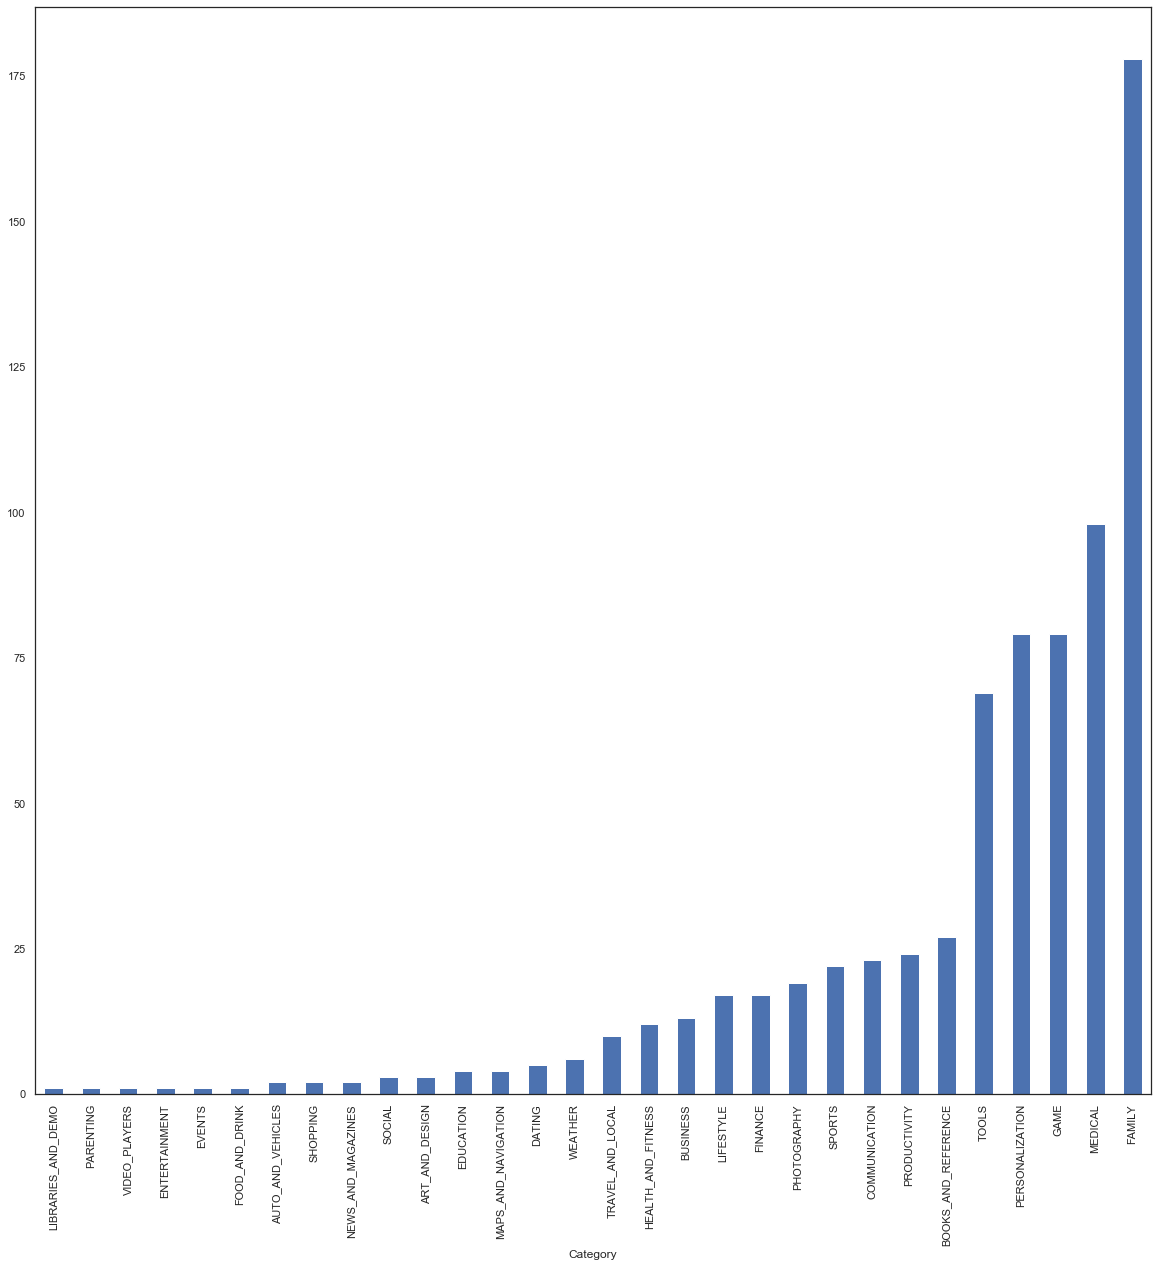

In [46]:
paid_df.groupby(['Category'])['Type'].count().sort_values(ascending = True).plot(kind = 'bar', figsize = (20,20))

Text(0.5, 1.0, ' Break Down of Free apps')

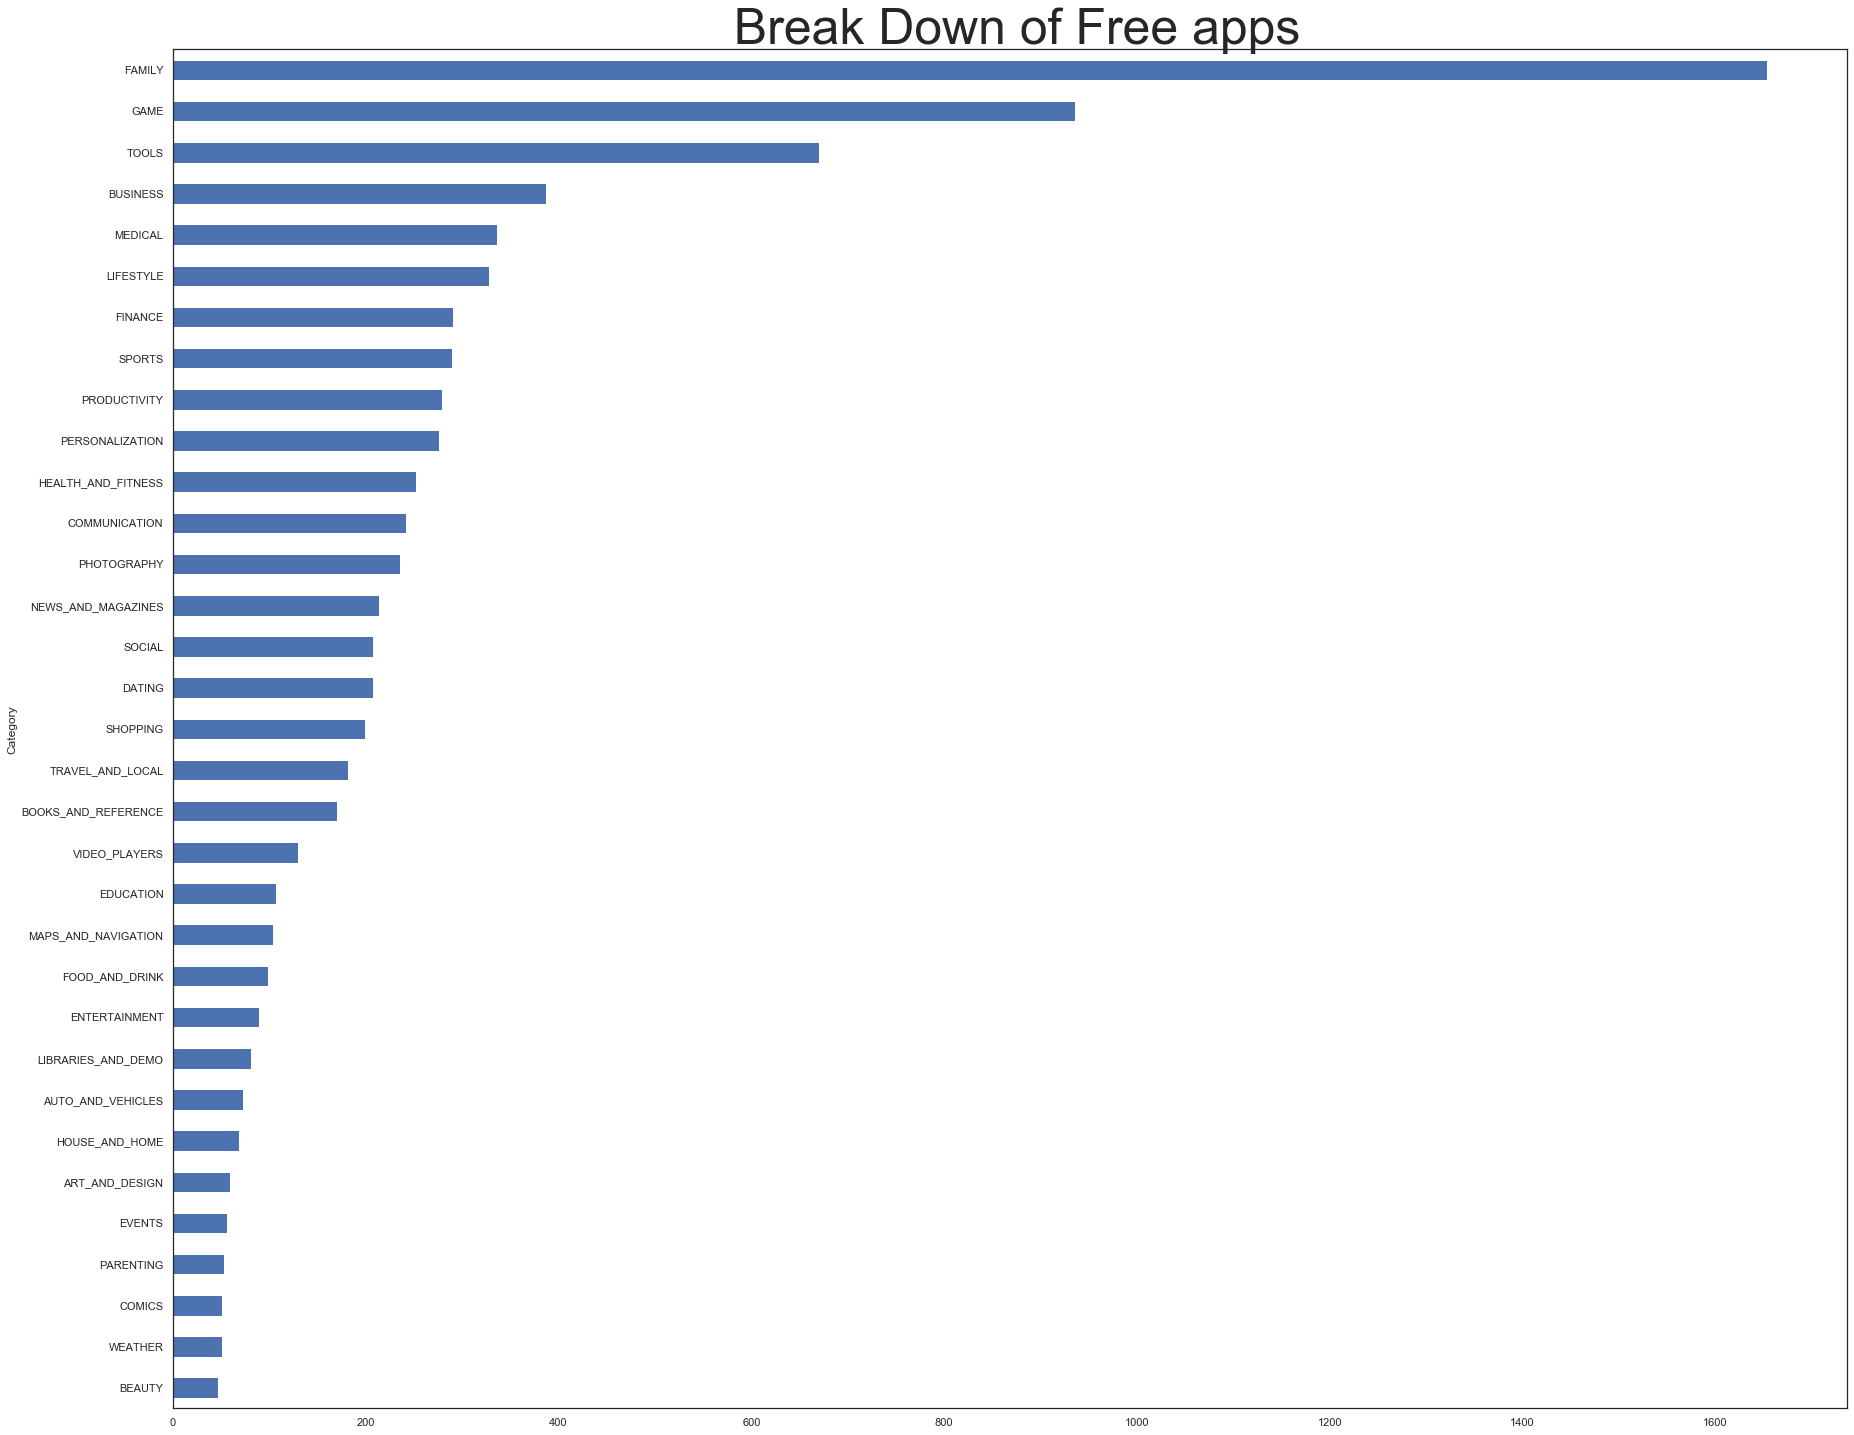

In [47]:
free_df.groupby('Category')['Type'].count().sort_values(ascending = True).plot(kind = 'barh', figsize = (30,25))
plt.title(" Break Down of Free apps" , size = 50)

In [1229]:
game_df['changedinstalls'] 
game_df['PriceinDollar'] = game_df['PriceinDollar'].map(lambda x: int(x))

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
game_df['Installs'].sort_values(ascending = False)

1729     500,000,000+
1702     500,000,000+
1966     500,000,000+
1886     500,000,000+
1885     500,000,000+
             ...     
4391           1,000+
5794           1,000+
5917               1+
10697              1+
5846               1+
Name: Installs, Length: 1015, dtype: object

In [49]:
game_df['changedinstalls']

1653      100000.0
1654     1000000.0
1655      500000.0
1656       10000.0
1657       10000.0
           ...    
10791         50.0
10792       1000.0
10793        500.0
10803       1000.0
10804        100.0
Name: changedinstalls, Length: 1015, dtype: float64

In [50]:
game_df.loc[game_df['Type'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ReviewsasInt,SizeasNum,PriceinDollar,changedinstalls
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,4447388.0,67.0,0.0,100000.0
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,27722264.0,76.0,0.0,1000000.0
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,22426677.0,74.0,0.0,500000.0
1656,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up,254258.0,23.0,0.0,10000.0
1657,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up,148897.0,46.0,0.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,GAME,4.0,1287,38M,"50,000+",Free,0,Everyone,Word,"December 18, 2013",1.0,2.2 and up,1287.0,38.0,0.0,50.0
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661,16M,"1,000,000+",Free,0,Everyone,Trivia,"May 24, 2018",1.3.81,4.0 and up,21661.0,16.0,0.0,1000.0
10793,Sid Story,GAME,4.4,28510,78M,"500,000+",Free,0,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up,28510.0,78.0,0.0,500.0
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,"1,000,000+",Free,0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up,56496.0,81.0,0.0,1000.0


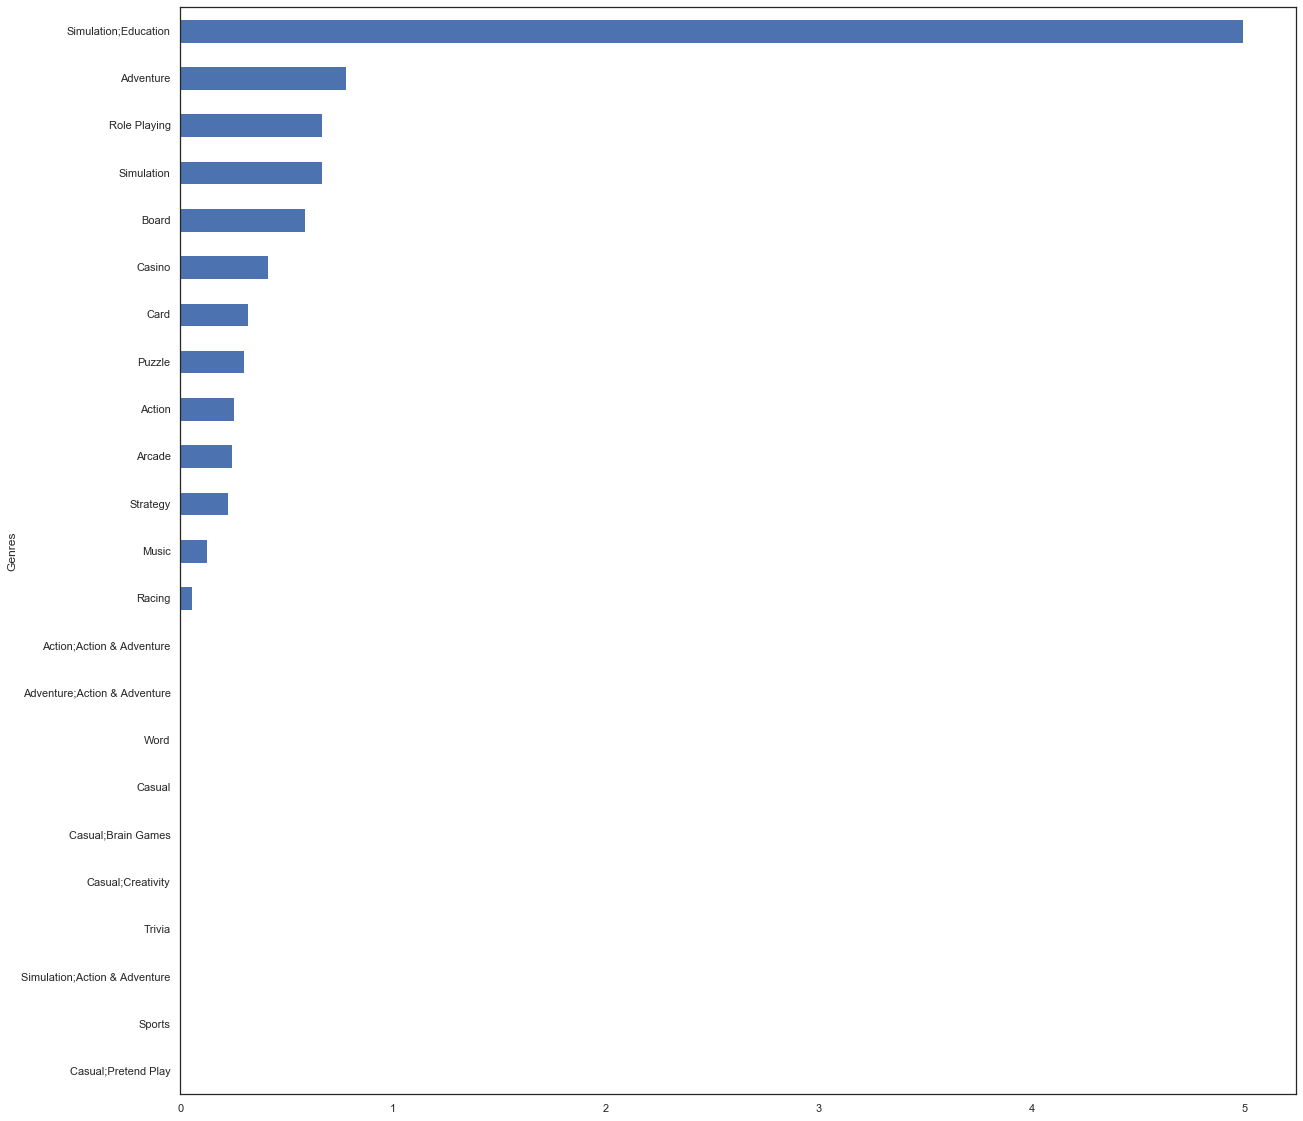

In [51]:
game_df.groupby('Genres')['PriceinDollar'].mean().sort_values().plot(kind = 'barh', figsize = (20,20))

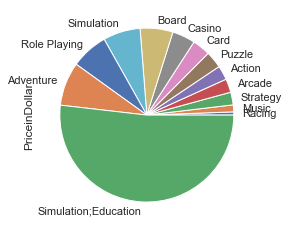

In [52]:
game_df.groupby('Genres')['PriceinDollar'].mean().sort_values().plot(kind = 'pie');

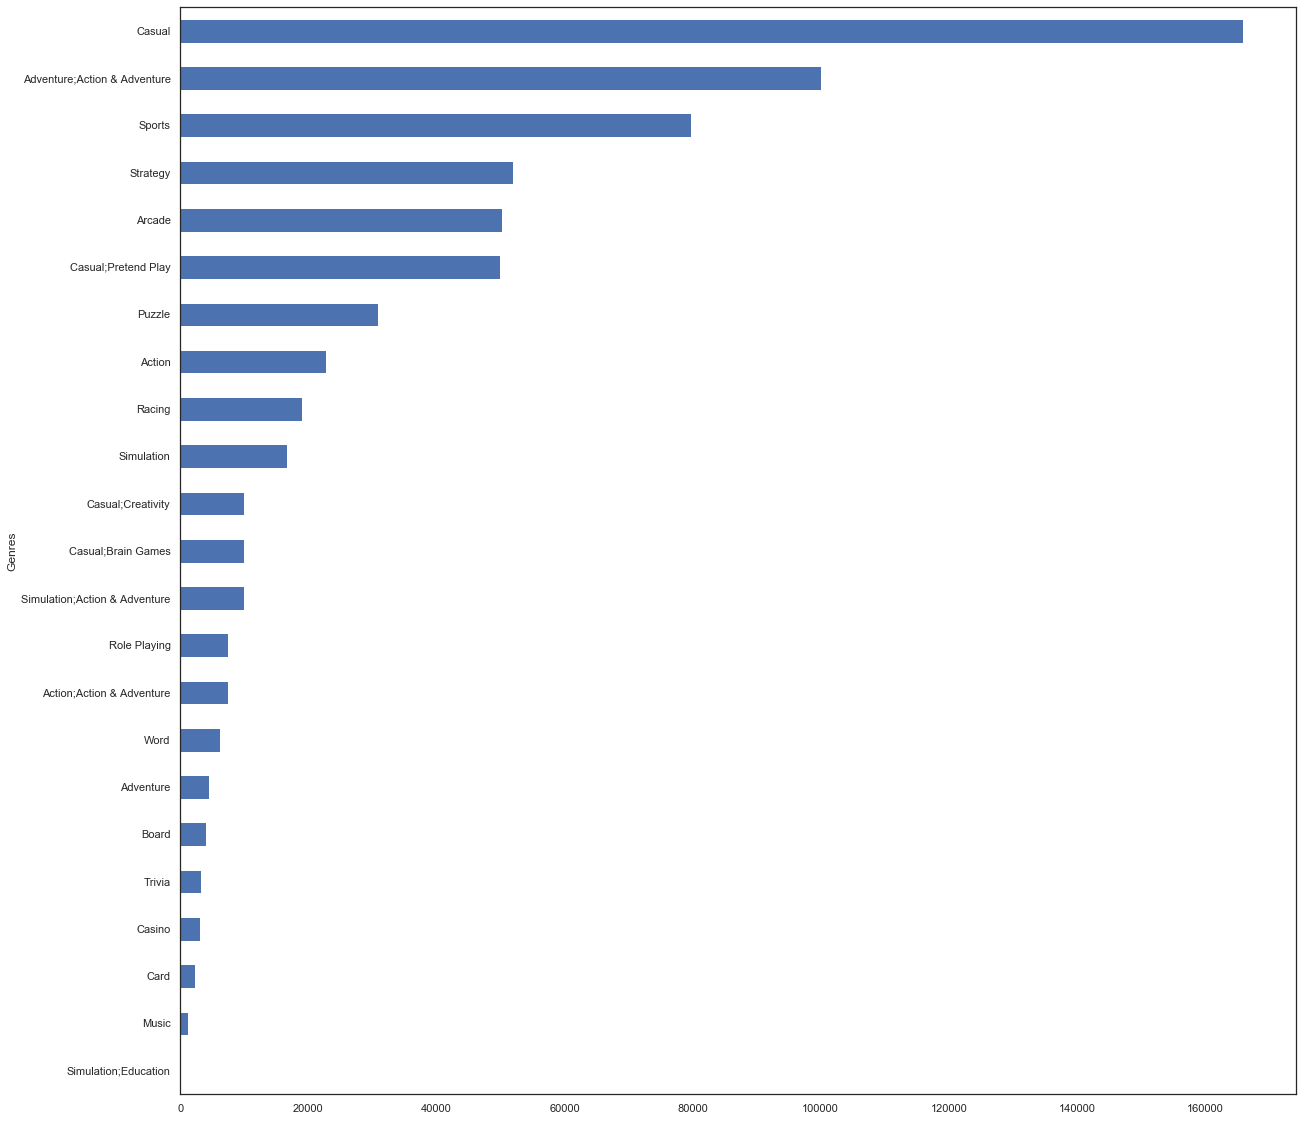

In [53]:
game_df.groupby('Genres')['changedinstalls'].mean().sort_values().plot(kind = 'barh', figsize = (20,20))

In [54]:
game_df.loc[game_df['Genres'] == 'Education']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ReviewsasInt,SizeasNum,PriceinDollar,changedinstalls


In [55]:
game_df.groupby('Genres')['Type'].count()

Genres
Action                           327
Action;Action & Adventure          2
Adventure                         69
Adventure;Action & Adventure       5
Arcade                           196
Board                             41
Card                              42
Casino                            34
Casual                            35
Casual;Brain Games                 1
Casual;Creativity                  1
Casual;Pretend Play                1
Music                             16
Puzzle                            33
Racing                            88
Role Playing                      15
Simulation                         9
Simulation;Action & Adventure      1
Simulation;Education               1
Sports                            14
Strategy                          22
Trivia                            37
Word                              25
Name: Type, dtype: int64

In [56]:
game_df.loc[game_df['Type']=="Free"] = True
game_df.loc[game_df['Type']=="Paid"] = False


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/panda

In [57]:
game_df.loc[(game_df['Genres'] == 'Simulation;Education')]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ReviewsasInt,SizeasNum,PriceinDollar,changedinstalls


# Question 6:
Anything else we should know about this dataset?

In [58]:
google_play_df.head();

In [59]:
google_play_reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [60]:
google_play_reviews_df['Sentiment_Polarity'].agg(['max','min','mean'])

max     1.000000
min    -1.000000
mean    0.182146
Name: Sentiment_Polarity, dtype: float64

In [61]:
google_play_reviews_df.dropna(inplace = True)

In [62]:
google_play_reviews_df['Translated_Review'] = google_play_reviews_df['Translated_Review'].astype(str)

In [63]:
## Creating new column for number of words
google_play_reviews_df['num_words'] = google_play_reviews_df['Translated_Review'].map(lambda x: len(x.split()))

In [64]:
google_play_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,num_words
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,21
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,7
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,6
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,3
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,2


,num_words,Sentiment_Polarity
App,,
Calendar+ Schedule Planner App,57.0,0.319071
Dashlane Free Password Manager,52.0,0.170754
Couple - Relationship App,50.0,0.266250
"Android Auto - Maps, Media, Messaging & Voice",49.0,0.286667
Fallout Shelter,46.5,0.189304
...,...,...
Dating for 50 plus Mature Singles – FINALLY,2.0,0.400000
Doctor Pets,2.0,0.091667
Flowers Live Wallpaper,2.0,0.391667


In [65]:
newdf = google_play_reviews_df.groupby('App')['num_words','Sentiment_Polarity'].median().sort_values(by = 'num_words', ascending = False)

In [66]:
display(newdf)

,num_words,Sentiment_Polarity
App,,
Calendar+ Schedule Planner App,57.0,0.319071
Dashlane Free Password Manager,52.0,0.170754
Couple - Relationship App,50.0,0.266250
"Android Auto - Maps, Media, Messaging & Voice",49.0,0.286667
Fallout Shelter,46.5,0.189304
...,...,...
Dating for 50 plus Mature Singles – FINALLY,2.0,0.400000
Doctor Pets,2.0,0.091667
Flowers Live Wallpaper,2.0,0.391667


In [67]:
google_play_reviews_df.groupby('App')['Sentiment_Polarity','Sentiment_Subjectivity'].median().sort_values(by = 'Sentiment_Polarity', ascending = False)

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
Cameringo Lite. Filters Camera,1.000000,0.300000
HomeWork,1.000000,0.300000
Google Slides,0.933333,0.916667
Daily Workouts - Exercise Fitness Routine Trainer,0.800000,0.750000
Bed Time Fan - White Noise Sleep Sounds,0.781250,0.600000
...,...,...
HTC Calendar,-0.187879,0.700000
Call of Duty:Black Ops Zombies,-0.192500,0.437037
DEER HUNTER 2018,-0.300000,0.400000


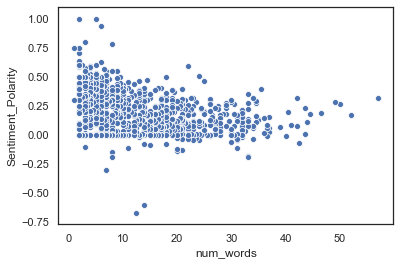

In [68]:
sns.scatterplot(x='num_words', y='Sentiment_Polarity', data = newdf)
newdf.corr()
google_play_reviews_df.describe();

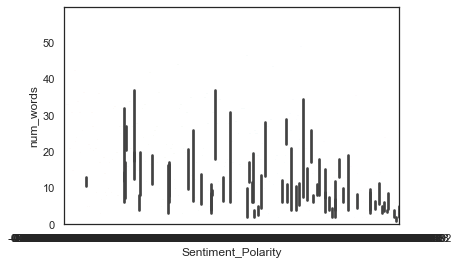

In [74]:
sns.barplot(y='num_words', x='Sentiment_Polarity', data = newdf)

num_words
1      AxesSubplot(0.125,0.125;0.775x0.755)
2      AxesSubplot(0.125,0.125;0.775x0.755)
3      AxesSubplot(0.125,0.125;0.775x0.755)
4      AxesSubplot(0.125,0.125;0.775x0.755)
5      AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
160    AxesSubplot(0.125,0.125;0.775x0.755)
174    AxesSubplot(0.125,0.125;0.775x0.755)
186    AxesSubplot(0.125,0.125;0.775x0.755)
188    AxesSubplot(0.125,0.125;0.775x0.755)
345    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sentiment_Polarity, Length: 146, dtype: object

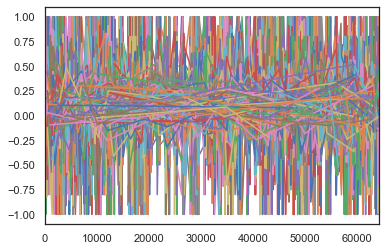

In [81]:
google_play_reviews_df.groupby('num_words')['Sentiment_Polarity'].plot()

In [80]:
google_play_reviews_df.groupby('Sentiment_Polarity')['num_words'].plot();

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x118f56ea0> (for post_execute):


KeyboardInterrupt: 

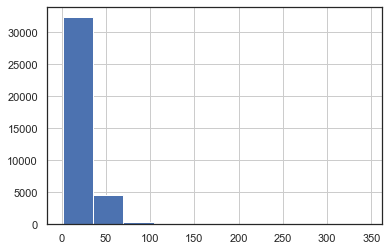

In [69]:
google_play_reviews_df['num_words'].()


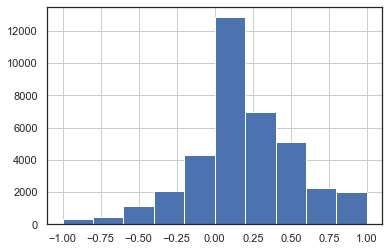

In [1182]:
google_play_reviews_df['Sentiment_Polarity'].hist()